In [ ]:
# Sin Wave Generator Using Recurrent Neural Networkmo.md(r"""# Sin Wave Generator Using Recurrent Neural Network""")

In [ ]:
import marimo as mo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Data Exploration

In [ ]:
df = pd.read_csv("Sin Wave Data Generator.csv", delimiter=",", nrows=600)
df.head()

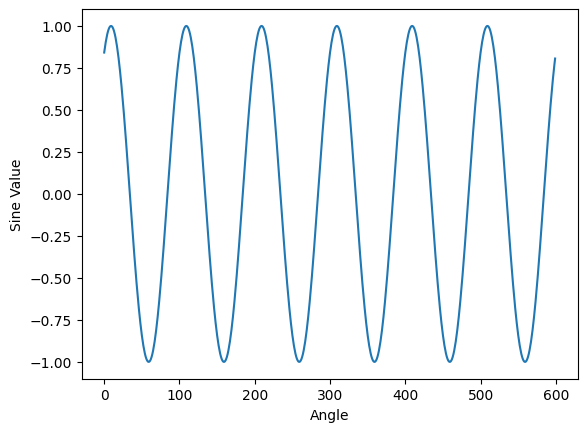

In [ ]:
plt.plot(df)
plt.xlabel("Angle")
plt.ylabel("Sine Value")

In [ ]:
# The .reshape(len(df)) operation reshapes the NumPy array into a 1-dimensional array with a length equal to the number of rows in the original DataFrame.
sine_wave = (df.to_numpy()).reshape(len(df))
sine_wave

[ 0.84147098 0.8737364 0.90255357 0.92780878 0.94940235 0.96724906
 0.98127848 0.99143524 0.99767927 0.9999859 0.99834605 0.99276619
 0.98326833 0.96988996 0.95268387 0.93171798 0.90707503 0.87885226
 0.84716106 0.81212651 0.77388686 0.73259304 0.68840801 0.64150614
 0.59207254 0.54030231 0.48639974 0.43057758 0.37305613 0.31406239
 0.25382919 0.19259425 0.13059922 0.06808878 0.00530962 -0.05749049
 -0.12006371 -0.1821631 -0.24354357 -0.30396289 -0.3631826 -0.420969
 -0.47709402 -0.53133618 -0.58348139 -0.63332387 -0.68066691 -0.72532366
 -0.7671179 -0.80588467 -0.84147098 -0.8737364 -0.90255357 -0.92780878
 -0.94940235 -0.96724906 -0.98127848 -0.99143524 -0.99767927 -0.9999859
 -0.99834605 -0.99276619 -0.98326833 -0.96988996 -0.95268387 -0.93171798
 -0.90707503 -0.87885226 -0.84716106 -0.81212651 -0.77388686 -0.73259304
 -0.68840801 -0.64150614 -0.59207254 -0.54030231 -0.48639974 -0.43057758
 -0.37305613 -0.31406239 -0.25382919 -0.19259425 -0.13059922 -0.06808878
 -0.00530962 0.05749049 0.12006371 0.1821631 0.24354357 0.30396289
 0.3631826 0.420969 0.47709402 0.53133618 0.58348139 0.63332387
 0.68066691 0.72532366 0.7671179 0.80588467 0.84147098 0.8737364
 0.90255357 0.92780878 0.94940235 0.96724906 0.98127848 0.99143524
 0.99767927 0.9999859 0.99834605 0.99276619 0.98326833 0.96988996
 0.95268387 0.93171798 0.90707503 0.87885226 0.84716106 0.81212651
 0.77388686 0.73259304 0.68840801 0.64150614 0.59207254 0.54030231
 0.48639974 0.43057758 0.37305613 0.31406239 0.25382919 0.19259425
 0.13059922 0.06808878 0.00530962 -0.05749049 -0.12006371 -0.1821631
 -0.24354357 -0.30396289 -0.3631826 -0.420969 -0.47709402 -0.53133618
 -0.58348139 -0.63332387 -0.68066691 -0.72532366 -0.7671179 -0.80588467
 -0.84147098 -0.8737364 -0.90255357 -0.92780878 -0.94940235 -0.96724906
 -0.98127848 -0.99143524 -0.99767927 -0.9999859 -0.99834605 -0.99276619
 -0.98326833 -0.96988996 -0.95268387 -0.93171798 -0.90707503 -0.87885226
 -0.84716106 -0.81212651 -0.77388686 -0.73259304 -0.68840801 -0.64150614
 -0.59207254 -0.54030231 -0.48639974 -0.43057758 -0.37305613 -0.31406239
 -0.25382919 -0.19259425 -0.13059922 -0.06808878 -0.00530962 0.05749049
 0.12006371 0.1821631 0.24354357 0.30396289 0.3631826 0.420969
 0.47709402 0.53133618 0.58348139 0.63332387 0.68066691 0.72532366
 0.7671179 0.80588467 0.84147098 0.8737364 0.90255357 0.92780878
 0.94940235 0.96724906 0.98127848 0.99143524 0.99767927 0.9999859
 0.99834605 0.99276619 0.98326833 0.96988996 0.95268387 0.93171798
 0.90707503 0.87885226 0.84716106 0.81212651 0.77388686 0.73259304
 0.68840801 0.64150614 0.59207254 0.54030231 0.48639974 0.43057758
 0.37305613 0.31406239 0.25382919 0.19259425 0.13059922 0.06808878
 0.00530962 -0.05749049 -0.12006371 -0.1821631 -0.24354357 -0.30396289
 -0.3631826 -0.420969 -0.47709402 -0.53133618 -0.58348139 -0.63332387
 -0.68066691 -0.72532366 -0.7671179 -0.80588467 -0.84147098 -0.8737364
 -0.90255357 -0.92780878 -0.94940235 -0.96724906 -0.98127848 -0.99143524
 -0.99767927 -0.9999859 -0.99834605 -0.99276619 -0.98326833 -0.96988996
 -0.95268387 -0.93171798 -0.90707503 -0.87885226 -0.84716106 -0.81212651
 -0.77388686 -0.73259304 -0.68840801 -0.64150614 -0.59207254 -0.54030231
 -0.48639974 -0.43057758 -0.37305613 -0.31406239 -0.25382919 -0.19259425
 -0.13059922 -0.06808878 -0.00530962 0.05749049 0.12006371 0.1821631
 0.24354357 0.30396289 0.3631826 0.420969 0.47709402 0.53133618
 0.58348139 0.63332387 0.68066691 0.72532366 0.7671179 0.80588467
 0.84147098 0.8737364 0.90255357 0.92780878 0.94940235 0.96724906
 0.98127848 0.99143524 0.99767927 0.9999859 0.99834605 0.99276619
 0.98326833 0.96988996 0.95268387 0.93171798 0.90707503 0.87885226
 0.84716106 0.81212651 0.77388686 0.73259304 0.68840801 0.64150614
 0.59207254 0.54030231 0.48639974 0.43057758 0.37305613 0.31406239
 0.25382919 0.19259425 0.13059922 0.06808878 0.00530962 -0.05749049
 -0.12006371 -0.1821631 -0.24354357 -0.30396289 -0.3631826 -0.420969
 -0.47709402 -0.53133618 -0.58348139 -0.63332387 -0.68066691 -0.7253236

# Split the Data into Training and Testing Sets

### This `(get_sequence_data)` function is used to create sequences of data from given DataFrame `(df)`. It generates input-output pairs `(X and Y)` where `X` contains sequences of a specified length `(seq_len)` and `Y` contains the next value in the sequence.

In [ ]:
def get_sequence_data(df, seq_len):
    if len(df) <= seq_len:
        raise ValueError("Length of df must be greater than seq_len.")

    X, Y = [], []
    nr_records = len(df) - seq_len

    for i in range(nr_records):
        X.append(df[i : i + seq_len])
        Y.append(df[i + seq_len])

    return np.array(X), np.array(Y)

In [ ]:
def get_test_data(df, seq_len, len_test):
    if len(df) <= seq_len + len_test:
        raise ValueError("Length of df must be greater than seq_len + len_test.")

    X, Y = [], []
    nr_records = len(df) - seq_len

    for i in range(nr_records - len_test, nr_records):
        X.append(df[i : i + seq_len])
        Y.append(df[i + seq_len])

    return np.array(X), np.array(Y)

In [ ]:
def list_to_array(X, Y):
    X = np.array(X)
    Y = np.array(Y)

    X = np.array(X)
    X = np.expand_dims(X, axis=2)

    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=1)

    return X, Y

In [ ]:
seq_len = T = 100
len_test = 100

In [ ]:
X_train, Y_train = get_sequence_data(sine_wave[: len(sine_wave)], seq_len)
X_train, Y_train = list_to_array(X_train, Y_train)
X_test, Y_test = get_test_data(sine_wave[: len(sine_wave)], seq_len, len_test)
X_test, Y_test = list_to_array(X_test, Y_test)

In [ ]:
len_data = X_train.shape[0]
len_data

500

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

# Implementation

In [ ]:
# Activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Forward Function

def forward(x, y, prev_s):
    layers = []

    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]

        m = np.dot(U, new_input)
        n = np.dot(W, prev_s)

        o = n + m

        s = sigmoid(o)
        p = np.dot(V, s)

        layers.append({"s": s, "prev_s": prev_s})
        prev_s = s

    return (m, n, o, s, p), layers

# Clip Min-Max Function

In [ ]:
def clip_min_max(dU, dV, dW):
    if dU.max() > max_clip_value:
        dU[dU > max_clip_value] = max_clip_value
    if dV.max() > max_clip_value:
        dV[dV > max_clip_value] = max_clip_value
    if dW.max() > max_clip_value:
        dW[dW > max_clip_value] = max_clip_value

    if dU.min() < min_clip_value:
        dU[dU < min_clip_value] = min_clip_value
    if dV.min() < min_clip_value:
        dV[dV < min_clip_value] = min_clip_value
    if dW.min() < min_clip_value:
        dW[dW < min_clip_value] = min_clip_value

    return dU, dV, dW

# Backward Function

In [ ]:
def backward(alpha, y, layers):
    m, n, o, s, p = alpha

    dU = np.zeros(U.shape)
    dV = np.zeros(V.shape)
    dW = np.zeros(W.shape)

    dU_t = np.zeros(U.shape)
    dV_t = np.zeros(V.shape)
    dW_t = np.zeros(W.shape)

    dU_i = np.zeros(U.shape)
    dW_i = np.zeros(W.shape)

    dp = p - y

    for t in range(T):
        dV_t = np.dot(dp, np.transpose(layers[t]["s"]))
        dsv = np.dot(np.transpose(V), dp)

        ds = dsv
        do = sigmoid(o) * (1 - sigmoid(o)) * ds
        dn = do * np.ones_like(n)

        dprev_s = np.dot(np.transpose(W), dn)

        for j in range(t - 1, max(-1, t - bptt_truncate - 1), -1):
            dV_i = np.dot(dp, np.transpose(layers[j]["s"]))

            ds = dsv + dprev_s
            do = sigmoid(o) * (1 - sigmoid(o)) * ds

            dn = do * np.ones_like(n)
            dm = do * np.ones_like(m)

            dW_i = np.dot(W, layers[t]["prev_s"])
            dprev_s = np.dot(np.transpose(W), dn)

            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            dU_i = np.dot(U, new_input)
            dx = np.dot(np.transpose(U), dm)

            dU_t += dU_i
            dV_t += dV_i
            dW_t += dW_i

        dU += dU_t
        dV += dV_t
        dW += dW_t

    return clip_min_max(dU, dV, dW)

# Optimize Function

In [ ]:
def optimize(alpha, grads):
    dU, dV, dW = grads
    U, V, W = alpha

    U -= learning_rate * dU
    V -= learning_rate * dV
    W -= learning_rate * dW

    return U, V, W

# Loss Function

In [ ]:
def loss_fn(alpha, y):
    m, n, o, s, p = alpha

    return (y - p) ** 2 / 2

In [ ]:
def val_loss_fn(alpha):
    m, n, o, s, p = alpha
    val_loss = 0.0

    for i in range(y_test.shape[0]):
        x, y = X_test[i], y_test[i]
        prev_s = np.zeros((hidden_dim, 1))
        alpha = forward(x, y, prev_s)

        loss_per_record = (y - p) ** 2 / 2
        val_loss += loss_per_record
    return val_loss / float(len_data)

# Training

In [ ]:
# Parameters

learning_rate = 0.0001
epochs = 16
bptt_truncate = 4
min_clip_value = -1
max_clip_value = 1
hidden_dim = 100
output_dim = 1

In [ ]:
np.random.seed(345)
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

In [ ]:
def train_model(
    X_train,
    Y_train,
    X_val,
    Y_val,
    U,
    V,
    W,
    hidden_dim,
    epochs,
    forward,
    loss_fn,
    backward,
    optimize,
    val_loss_fn,
):
    for epoch in range(epochs):
        # Initialize epoch loss
        train_loss = 0.0

        # Training loop
        for i in range(len(X_train)):
            X, Y = X_train[i], Y_train[i]
            prev_s = np.zeros((hidden_dim, 1))  # Initialize hidden state

            # Forward pass
            alpha, layers = forward(X, Y, prev_s)

            # Compute loss
            train_loss += loss_fn(alpha, Y)

            # Backward pass
            grads = backward(alpha, Y, layers)

            # Update parameters
            U, V, W = optimize((U, V, W), grads)

        # Average training loss
        train_loss /= len(X_train)

        # Validation loss (every 2 epochs)
        if (epoch + 1) % 2 == 0:
            val_loss = 0.0
            for i in range(len(X_val)):
                X, Y = X_val[i], Y_val[i]
                prev_s = np.zeros((hidden_dim, 1))  # Initialize hidden state
                alpha, _ = forward(X, Y, prev_s)
                val_loss += val_loss_fn(alpha, Y)
            val_loss /= len(X_val)
        else:
            val_loss = None

        # Print progress
        if val_loss is not None:
            print(
                f"Epoch:{epoch + 1:3d}, Train Loss:{train_loss:12.4f}, Val Loss:{val_loss:12.4f}"
            )
        else:
            print(f"Epoch:{epoch + 1:3d}, Train Loss:{train_loss:12.4f}")

    return U, V, W

# Analyze Results

In [ ]:
def predict(X_test, U, V, W, hidden_dim, T, sigmoid):
    preds = []
    for i in range(X_test.shape[0]):
        x = X_test[i]  # Input sequence for the i-th test example
        prev_s = np.zeros((hidden_dim, 1))  # Initialize hidden state

        # Forward pass through the sequence
        for t in range(T):
            mulu = np.dot(U, x[t].reshape(-1, 1))  # Input contribution
            mulw = np.dot(W, prev_s)  # Hidden state contribution
            add = mulw + mulu  # Pre-activation
            s = sigmoid(add)  # Current hidden state
            mulv = np.dot(V, s)  # Output
            prev_s = s  # Update hidden state

        preds.append(mulv)  # Store final output

    # Concatenate and squeeze predictions
    preds = np.concatenate(preds, axis=1).squeeze()
    return preds

In [ ]:
# Create plot
plt.figure(figsize=(12, 8))
plt.plot(
    preds, "b-o", label="Predicted", markersize=5
)  # Blue solid line with circles
plt.plot(
    y_test.squeeze(), "r--s", label="Expected", markersize=5
)  # Red dashed line with squares
plt.title("Predicted vs Expected Values")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

<span class="codehilite"><div class="highlight"><pre><span></span><span class="gt">Traceback (most recent call last):</span>
  File <span class="nb">&quot;/home/abdullahalazmi/.local/lib/python3.13/site-packages/marimo/_runtime/executor.py&quot;</span>, line <span class="m">141</span>, in <span class="n">execute_cell</span>
<span class="w">    </span><span class="n">exec</span><span class="p">(</span><span class="n">cell</span><span class="o">.</span><span class="n">body</span><span class="p">,</span> <span class="n">glbls</span><span class="p">)</span>
<span class="w">    </span><span class="pm">~~~~^^^^^^^^^^^^^^^^^^</span>
  File <span class="nb">&quot;/tmp/marimo_97890/__marimo__cell_TXez_.py&quot;</span>, line <span class="m">4</span>, in <span class="n">&lt;module&gt;</span>
<span class="w">    </span><span class="n">preds</span><span class="p">,</span> <span class="s2">&quot;b-o&quot;</span><span class="p">,</span> <span class="n">label</span><span class="o">=</span><span class=